In [1]:
### Импортируем библиотеки
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [50]:
### Вызываем файл
df_hr = pd.read_csv('tiktok.csv')

In [3]:
pd.set_option('display.max_columns', None)

# Проблема

Платформа TikTok стала невероятно популярной за последние 3 года, [обогнав YouTube по количеству watchtime](https://www.theverge.com/2021/9/7/22660516/tiktok-average-watch-time-youtube-us-android-app-annie). Музыканты часто становятся популярными, когда их песни становятся базой для трендов видео в TikTok. 

[Некоторые пытались создать "вирусную" песню](https://www.youtube.com/watch?v=Xa4Ge7E-4ZA), чтобы создать тренд, однако в этот раз мы попробуем посмотреть, какими параметрами должна обладать песня для максимальной популярности, используя **BigData**.

# Описание датасета

Датасет был взят по [ссылке](https://www.kaggle.com/yamqwe/tiktok-trending-tracks).

In [51]:
df_hr.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name,duration_mins,genre
0,6kVuF2PYLuvl9T85XjNbaO,Lay It Down Gmix - Main,1Xfmvd48oOhEWkscWyEbh9,Lloyd,43C6GVlhXG4KfZuEbxty3r,302186,2011-01-01,28,0.597,0.800,1,-5.423,0,0.312,0.046,0.000,0.180,0.565,155.932,6kVuF2PYLuvl9T85XjNbaO,6kVuF2PYLuvl9T85XjNbaO,5.036,TIKTOK DANCE
1,1RGIjMFMgJxkZHMDXVYzOJ,Bartender (feat. Akon),3aQeKQSyrW4qWr35idm0cy,T-Pain,6CrSEKCF4TYrbSIitegb3h,238800,2007-06-05,75,0.832,0.391,8,-8.504,1,0.063,0.056,0.000,0.224,0.436,104.961,1RGIjMFMgJxkZHMDXVYzOJ,1RGIjMFMgJxkZHMDXVYzOJ,3.980,TIKTOK DANCE
2,1RGIjMFMgJxkZHMDXVYzOJ,Bartender (feat. Akon),3aQeKQSyrW4qWr35idm0cy,T-Pain,6CrSEKCF4TYrbSIitegb3h,238800,2007-06-05,75,0.832,0.391,8,-8.504,1,0.063,0.056,0.000,0.224,0.436,104.961,1RGIjMFMgJxkZHMDXVYzOJ,1RGIjMFMgJxkZHMDXVYzOJ,3.980,TIKTOK DANCE
3,1dIWPXMX4kRHj6Dt2DStUQ,Chosen (feat. Ty Dolla $ign),4qXC0i02bSFstECuXP2ZpL,Blxst,7AwrgenNcTAJlJF3pKL0Qr,161684,2020-12-04,76,0.571,0.767,2,-5.160,1,0.287,0.336,0.000,0.081,0.605,93.421,1dIWPXMX4kRHj6Dt2DStUQ,1dIWPXMX4kRHj6Dt2DStUQ,2.695,TIKTOK DANCE
4,4QVS8YCpK71R4FsxSMCjhP,Tie Me Down (with Elley Duhé),2ZRQcIgzPCVaT9XKhXZIzh,Gryffin,69t8rpgBN1ov5kCU6LDMuR,218295,2018-08-03,72,0.548,0.839,6,-2.371,1,0.064,0.135,0.000,0.102,0.314,98.932,4QVS8YCpK71R4FsxSMCjhP,4QVS8YCpK71R4FsxSMCjhP,3.638,TIKTOK DANCE


In [52]:
#удаляем дубляжи по id песни 
df_hr = df_hr.drop_duplicates(subset=['track_id'])

In [53]:
df_hr.describe()

,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins
count,3560.000,3560.000,3560.000,3560.000,3560.000,3560.000,3560.000,3560.000,3560.000,3560.000,3560.000,3560.000,3560.000,3560.000
mean,194770.595,50.539,0.728,0.637,5.218,-6.967,0.590,0.136,0.211,0.040,0.181,0.538,120.992,3.246
std,60734.615,24.732,0.139,0.181,3.664,2.997,0.492,0.128,0.236,0.152,0.137,0.236,25.874,1.012
min,43426.000,0.000,0.150,0.024,0.000,-26.888,0.000,0.023,0.000,0.000,0.019,0.033,54.367,0.724
25%,155754.000,35.000,0.648,0.516,1.000,-8.486,0.000,0.045,0.030,0.000,0.094,0.355,100.904,2.596
50%,186088.000,55.000,0.743,0.643,5.000,-6.460,1.000,0.080,0.119,0.000,0.124,0.537,122.013,3.101
75%,222957.750,70.000,0.830,0.775,8.000,-4.931,1.000,0.190,0.306,0.000,0.233,0.727,134.982,3.716
max,716206.000,100.000,0.990,0.999,11.000,1.077,1.000,0.911,0.991,0.962,0.952,0.998,216.053,11.937


К сожалению, описания переменных не было (например, почему громкость в отрицательных значениях), но сам датасет не содержит пропущенных значений.

In [ ]:
#преобразуем громкость в обратные значения, потому что удобнее воспринимать положительные величины
df_hr['loudness'] = -df_hr['loudness']

In [8]:
#посмотри как выглядят самые популярные песни
df_hr[df_hr['popularity'] >= 95].sort_values('popularity', ascending = False)

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name,duration_mins,genre
290,67BtfxlNbhBmCDR2L2l8qd,MONTERO (Call Me By Your Name),7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,2Hjcfw8zHN4dJDZJGOzLd6,137875,2021-03-31,100,0.610,0.508,8,6.682,0,0.152,0.297,0.000,0.384,0.758,178.818,67BtfxlNbhBmCDR2L2l8qd,67BtfxlNbhBmCDR2L2l8qd,2.298,TIKTOK DANCE
60,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),1uNFoZAHBGtllmzznpCI3s,Justin Bieber,5dGWwsZ9iB2Xc3UKR0gif2,198081,2021-03-19,99,0.677,0.696,0,6.181,1,0.119,0.321,0.000,0.420,0.464,90.030,4iJyoBOLtHqaGxP12qzhQI,4iJyoBOLtHqaGxP12qzhQI,3.301,TIKTOK DANCE
11,3VqeTFIvhxu3DIe4eZVzGq,Butter,3Nrfpe0tUJi4K4DXYWgMUX,BTS,2BDhPi2XCYujYxU6VM0QaD,164441,2021-05-21,98,0.759,0.459,8,5.187,1,0.095,0.003,0.000,0.091,0.695,109.997,3VqeTFIvhxu3DIe4eZVzGq,3VqeTFIvhxu3DIe4eZVzGq,2.741,TIKTOK DANCE
24,748mdHapucXQri7IAO8yFK,Kiss Me More (feat. SZA),5cj0lLjcoR7YOSnhnX0Po5,Doja Cat,1OnzqJTL9bwe4kvaLxRYxt,208866,2021-04-09,98,0.762,0.701,8,3.541,1,0.029,0.235,0.000,0.123,0.742,110.968,748mdHapucXQri7IAO8yFK,748mdHapucXQri7IAO8yFK,3.481,TIKTOK DANCE
170,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,7dfPqXck6BB9wpThrVYBss,242096,2021-03-05,96,0.586,0.616,5,7.964,1,0.032,0.182,0.000,0.093,0.719,148.088,7MAibcTli4IisCtbHKrGMh,7MAibcTli4IisCtbHKrGMh,4.035,TIKTOK DANCE
1264,6PERP62TejQjgHu81OHxgM,good 4 u,1McMsnEElThX1knmY4oliG,Olivia Rodrigo,3rMjL8NA5Wh2hbMNk2fSlY,178147,2021-05-14,96,0.556,0.661,6,5.052,0,0.204,0.300,0.000,0.101,0.668,168.560,6PERP62TejQjgHu81OHxgM,6PERP62TejQjgHu81OHxgM,2.969,TIKTOK DANCE
1722,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,1uU7g3DNSbsu0QjSEqZtEd,Masked Wolf,7vus4Q8r5DS2Dl1JClxEsA,132780,2021-01-06,96,0.778,0.695,4,6.865,0,0.091,0.175,0.000,0.150,0.472,149.996,3Ofmpyhv5UAQ70mENzB277,3Ofmpyhv5UAQ70mENzB277,2.213,TIKTOK DANCE
1278,61KpQadow081I2AsbeLcsb,deja vu,1McMsnEElThX1knmY4oliG,Olivia Rodrigo,3lwHyR4joA1xB7Nun21EP6,215507,2021-04-01,95,0.439,0.610,9,7.236,1,0.116,0.593,0.000,0.341,0.172,181.088,61KpQadow081I2AsbeLcsb,61KpQadow081I2AsbeLcsb,3.592,TIKTOK DANCE
4251,43PGPuHIlVOc04jrZVh9L6,RAPSTAR,6AgTAQt8XS6jRWi4sX7w49,Polo G,0SVzFcpsByITKgURaxXdsV,165925,2021-04-09,95,0.789,0.536,6,6.862,1,0.242,0.410,0.000,0.129,0.437,81.039,65LdqYCLcsV0lJoxpeQ6fW,TikTok Songs 2021 Tik Tok Hits ⚡Summer 2021,2.765,_TIKTOK
5739,7Bk0uXKk1uPT0XuQbpFzvs,Fiel,0n6sKrG0xKAf8xmdqeNGke,Los Legendarios,7g5WqPI4CdA22Cy8LxRXCf,261665,2021-02-04,95,0.849,0.701,6,4.407,0,0.060,0.407,0.000,0.112,0.505,98.005,7o1OzDq4DMLMbenntkLpst,"TikTok Latino Trends 🍑🔥 - Todo De Ti, Poblado,...",4.361,_TIKTOK


В целом самые популярные песни принадлежат уже популярным музыкантам, однако изучение того, что их объединяет между собой, может показать, какие песни предпочитает алгоритм и люди.

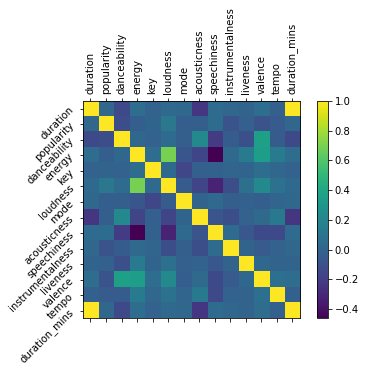

In [77]:
figure, axis = plt.subplots(1,1)
figure.colorbar(axis.matshow(df_hr.corr()))
labels = ['duration', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',  'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence',  'tempo', 'duration_mins']

axis.set_xticks(np.arange(len(labels)))
axis.set_yticks(np.arange(len(labels)))
axis.set_xticklabels(labels, rotation = 90)
axis.set_yticklabels(labels, rotation = 45)
fig.set_size_inches(100, 20)
plt.show()

Единственные значимые взаимосвязанные переменные -- это *громкость* и *энергичность*, причём эта связь отрицательная, но это связано тем, что мы преобразовали громкость в обратную (на самом деле чем громче песня, тем она более энергичная). 

Продолжительность представлена двумя переменными, поэтому использовать мы будем только ту, которая в минутах.

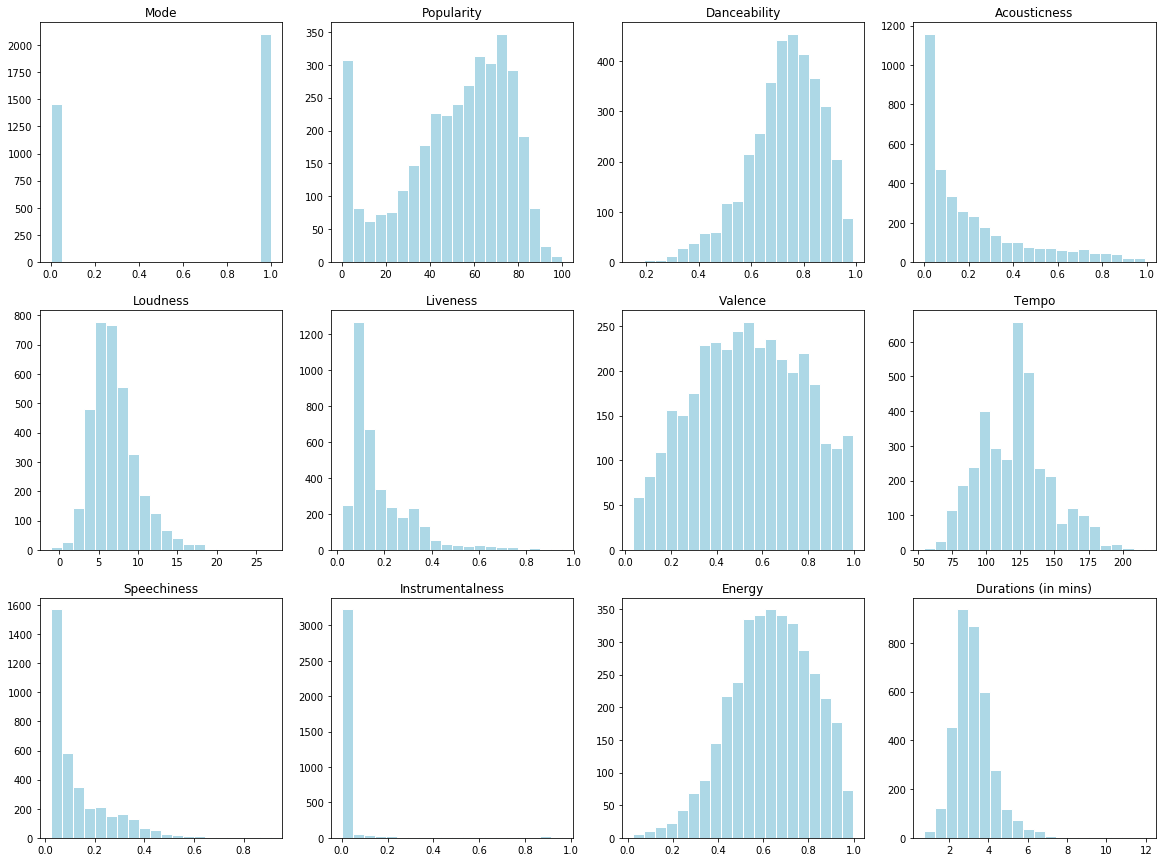

In [9]:
# Отображаем некоторые переменные
figure, axis = plt.subplots(3, 4)
axis[0, 0].hist(df_hr['mode'], color = 'lightblue', edgecolor = 'white',
         bins = 20)
axis[0, 0].set_title("Mode")

axis[0, 1].hist(df_hr['popularity'], color = 'lightblue', edgecolor = 'white',
         bins = 20)
axis[0, 1].set_title("Popularity")

axis[0, 2].hist(df_hr['danceability'], color = 'lightblue', edgecolor = 'white',
         bins = 20)
axis[0, 2].set_title("Danceability")

axis[0, 3].hist(df_hr['acousticness'], color = 'lightblue', edgecolor = 'white',
         bins = 20)
axis[0, 3].set_title("Acousticness")


axis[1, 0].hist(df_hr['loudness'], color = 'lightblue', edgecolor = 'white',
         bins = 20)
axis[1, 0].set_title("Loudness")

axis[1, 1].hist(df_hr['liveness'], color = 'lightblue', edgecolor = 'white',
         bins = 20)
axis[1, 1].set_title("Liveness")

axis[1, 2].hist(df_hr['valence'], color = 'lightblue', edgecolor = 'white',
         bins = 20)
axis[1, 2].set_title("Valence")

axis[1, 3].hist(df_hr['tempo'], color = 'lightblue', edgecolor = 'white',
         bins = 20)
axis[1, 3].set_title("Tempo")



axis[2, 0].hist(df_hr['speechiness'], color = 'lightblue', edgecolor = 'white',
         bins = 20)
axis[2, 0].set_title("Speechiness")

axis[2, 1].hist(df_hr['instrumentalness'], color = 'lightblue', edgecolor = 'white',
         bins = 20)
axis[2, 1].set_title("Instrumentalness")

axis[2, 2].hist(df_hr['energy'], color = 'lightblue', edgecolor = 'white',
         bins = 20)
axis[2, 2].set_title("Energy")

axis[2, 3].hist(df_hr['duration_mins'], color = 'lightblue', edgecolor = 'white',
         bins = 20)
axis[2, 3].set_title("Durations (in mins)")


fig = plt.gcf()
fig.set_size_inches(20, 15)
plt.show()

# Построение моделей

In [ ]:
### Определяем функцию нормировки
def scaling(df):
    scaler = MinMaxScaler() 
    data_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(data_scaled)
    return df_scaled

In [10]:
### Определяем функцию подсчёта R^2
def model_access(lin_model, X_train, X_test, Y_train, Y_test):

    y_train_predict = lin_model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)

    
    print("\n")
    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("--------------------------------------")
    print("\n")

    
    y_test_predict = lin_model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

In [12]:
### Строим регрессию
X = df_hr[[ 'danceability', 'energy', 'key', 'loudness', 'mode',  'speechiness', 'instrumentalness', 'valence',  'tempo']]
y = df_hr[['popularity']]

X_scaled = scaling(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=9)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

importance = lin_model.coef_
print(importance)

[[-16.76258948 -21.28820914  -0.26098654 -54.05675714  -1.50401697
    1.68938536  -9.03285504  -3.90047804  -6.24449542]]


In [13]:
### Измеряем её качество
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 23.947523613819502
R2 score is 0.05131395637715175
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 24.0559615667127
R2 score is 0.09455165460437365


Однако при анализе датасета можно было увидеть, что есть большое количество непопулярных песен, которые не становятся вирусными, а потом распределение начинает быть похоже на нормальное. Попробуем анализировать именно те песни, которые преодолели порог.

In [44]:
#создаём датасет, в котором находятся только те песни, у которых популярность не меньше, чем среднее-std
real_popular = df_hr['popularity'] > 10
df_pop = df_hr[real_popular]

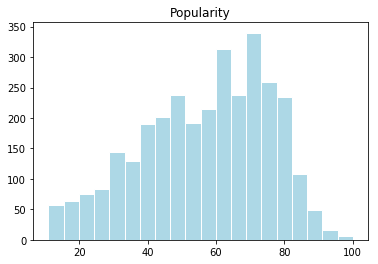

In [45]:
plt.hist(df_pop['popularity'], color = 'lightblue', edgecolor = 'white',
         bins = 20)
plt.title("Popularity")
plt.show()

In [46]:
### Строим регрессию
X = df_pop[['duration_mins',  'energy', 'loudness', 'mode',  'acousticness', 'instrumentalness','valence', 'liveness', 'tempo']]
y = df_pop[['popularity']]

X_scaled = scaling(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=9)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

importance = lin_model.coef_
print(importance)

[[ 14.83441819 -17.05594372 -51.12761457  -1.661589     6.19070248
   -5.58696362  -1.37908562  -1.5978707   -4.40691648]]


In [47]:
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 18.378625636141187
R2 score is 0.059782828757376505
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 17.30453865490355
R2 score is 0.07632353147366566


# Результаты

## Обычная модель
В числе трёх самых значимых для регрессии фичей полной модели были включены:

* Громкость
* Энергичность
* Танцевальность

В дополнение были выделены следующие фичи:
* Тональность
* Лад (минор/мажор)
* Словесность
* Инструментальность
* Позитивность
* Темп

*Удаление любой из этих переменных приводит к ухудшению модели.*

## "Популярная" модель
В то время как в "популярной" модели три самые значимые фичи:
* Громкость
* Энергичность
* Продолжительность

В дополнение включено:
* Лад
* Акустичность
* Инструментальность
* Позитивность
* Живость
* Темп

*Удаление любой из этих переменных приводит к ухудшению модели.*

# Значимость модели
В целом модель имеет очень низкую значимость: на тестировочной выборке она всего 10%. Можно было предположить, что из-за выброса песен с низкой популярностью модель, где они отбрасываются, будет обладать большим качеством, однако это не так: значимые переменные отличаются, значимость наоборот меньше, всего 7 процентов. Можно сделать вывод, что в целом построить "вирусную" песню на тиктоке с помощью алгоритмов невозможно -- этот процесс случайный. Также предсказать какая песня будет совсем не популярной можно, а вот предсказать, какая песня будет популярнее среди уже популярных, намного сложнее. 

Также можно предположить, что это связано с тем, что трендом становятся небольшие отрезки песни. Даже если вся песня медленная и тихая, то трендом может стать небольшой громкий и энергичный отрезок. Тем не менее, можно рассмотреть значимые переменные и получить некоторые инсайты.


# Общие значимые переменные:
## 1. Громкость
Эта песня самая популярная в обеих моделях. Можно предположить, что громкие песни привлекают внимание и позволяют выбрать фрагмент песни, который сможет создать тренд. Однако переменная с отрицательным знаком, что говорит о том, что чем громче песня, тем ниже её популярность. Можно предположить, что тихие песни позволяют интерпретировать их по-разному (как танцевать под них, как говорить поверх них) и что они не раздражают.

## 2. Энергичность
Это переменная, которая вторая в топ-3 значимых переменных для обеих моделей. Можно предположить, что создать вирусный ролик с медленной или скучной песней практически невозможно, однако она включена в обе модели с отрицательным знаком. Среди самых популярных песен много песен про "*heartbreak*", поэтому можно предположить, что эта тема позволяет раскрутить свою песню.

При анализе датасета было обнаружено, что эти две переменные взаимосвязаны.

# Другие значимые переменные

## 3.1 Танцевальность
Эта переменная значимая в обычной модели, но при этом с отрицательным знаком. Те песни, которые предназначены именно для танцев, не становятся популярными.


## 3.2. Продолжительность
Эта переменная значимая в "популярной" модели. Чем длиннее песня, тем выше её популярность. Можно предположить, что в длинной песне больше фрагментов, из которых можно сделать тренды (например, разные куплеты).


# Выводы
Можно сделать два основных вывода: 
* создать идеальную "*ticktokable*" песню с помощью алгоритмов нельзя
* тренды песен тиктока включают в себя не только песни, созданные для танцев. 

Несмотря на то, что Тикток вырос из Musicality, он стал платформой для разных креативных личностей, не только танцоров (например, комедийные ролики). Для них важны другие характеристики песни (смешной или необычный текст, текст, который можно интерпретировать по-разному и т.д.).